In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
fig_width = 12
%matplotlib inline

In [2]:
import bayesianchangepoint as bcp



## performing inference: application to experimental data


get your trump data:

https://github.com/bpb27/trump_tweet_data_archive

In [3]:
from io import BytesIO
from zipfile import ZipFile
import urllib.request
import json

datafile = '/tmp/trumpets.json'
try:
    with open(datafile, 'r') as f:
        data = json.load(f)
except:
    years = [2, 3, 4, 5, 6, 7]
    data = []
    for year in years:
        url = urllib.request.urlopen("https://github.com/bpb27/trump_tweet_data_archive/blob/master/master_201{0}.json.zip?raw=true".format(str(year)))

        with ZipFile(BytesIO(url.read())) as my_zip_file:
            for contained_file in my_zip_file.namelist():
                with my_zip_file.open(contained_file) as f:
                    data.extend(json.load(f))
    with open(datafile, 'w') as f:
        json.dump(data, f)
                

In [4]:
n_tweets = len(data)

## example tweet

In [5]:
d = data[34]
d#.keys()#['followers_count']

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Dec 27 20:51:05 +0000 2012',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'youtu.be/74TFS8r_SMI',
    'expanded_url': 'http://youtu.be/74TFS8r_SMI',
    'indices': [29, 49],
    'url': 'http://t.co/YeBeTEfe'}],
  'user_mentions': [{'id': 23065354,
    'id_str': '23065354',
    'indices': [1, 11],
    'name': 'Mac',
    'screen_name': 'MacMiller'},
   {'id': 10228272,
    'id_str': '10228272',
    'indices': [85, 93],
    'name': 'YouTube',
    'screen_name': 'YouTube'}]},
 'favorite_count': 181,
 'favorited': False,
 'geo': None,
 'id': 284401034523189249,
 'id_str': '284401034523189249',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 364,
 'retweeted': False,
 'source': '

## evolution of followers

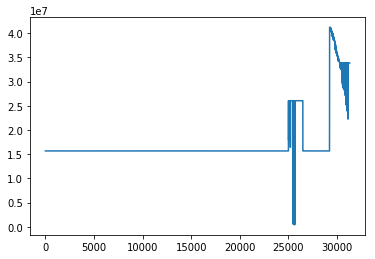

In [6]:
followers = [data[i]['user']['followers_count'] for i in range(n_tweets)]
plt.plot(followers);

In [7]:
i= 42
data_texts = []
for i in range(n_tweets):
    try:
        data_texts.append(data[i]['full_text'].lower())
    except KeyError:
        data_texts.append(data[i]['text'].lower())

data_texts[i]

'to all americans-\n#happynewyear &amp; many blessings to you all! looking forward to a wonderful &amp; prosperous 2017 as we… https://t.co/1asdmal4iy'

In [ ]:
word = 'america'
contains_word = np.array([(word in data_text) for data_text in data_texts])
print(sum(contains_word), 'tweets contain the word "', word, '" on a total of ', n_tweets, 'tweets')

2554 tweets contain the word " america " on a total of  31306 tweets


In [ ]:
p_bar, r, beliefs = bcp.inference(contains_word, h=1/1500, p0=.5)

In [ ]:
fig, axs = bcp.plot_inference(contains_word, None, p_bar, r, beliefs, mode='max', max_run_length=2500)

In [ ]:
datetimes = [data[i]['created_at'] for i in range(n_tweets)]
print('|'+datetimes[0]+'|')

In [ ]:
import locale
locale.getlocale()

In [ ]:
from datetime import datetime

datetimes = [datetime.strptime(data[i]['created_at'], '%a %b %d %H:%M:%S %z %Y') for i in range(n_tweets)]
print('Timestamp=', datetimes[0].timestamp())

In [ ]:
from datetime import datetime

datetimes = np.array([datetime.strptime(data[i]['created_at'], '%a %b %d %H:%M:%S %z %Y').timestamp() for i in range(n_tweets)])
print('Timestamp=', (datetimes[0]))

In [ ]:
from datetime import datetime

datetimes = [datetime.strptime(data[i]['created_at'], '%a %b %d %H:%M:%S %z %Y') for i in range(n_tweets)]
print('Timestamp=', datetimes[0].timestamp())


Using https://matplotlib.org/examples/api/date_demo.html

In [ ]:
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')
fig_width = 13
fig, ax = plt.subplots(figsize=(fig_width, fig_width/1.6180))

p_hat, r_hat = bcp.readout(p_bar, r, beliefs)#, mode='max')

ax.plot(datetimes, p_hat)


#datemin = datetime.date(datetimes.min(), 1, 1)
#datemax = datetime.date(datetimes.max() + 1, 1, 1)
#ax.set_xlim(datemin, datemax)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
